## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [3]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Cylinder     804 non-null    int64  
 3   Doors        804 non-null    int64  
 4   Cruise       804 non-null    int64  
 5   Sound        804 non-null    int64  
 6   Leather      804 non-null    int64  
 7   Buick        804 non-null    int64  
 8   Cadillac     804 non-null    int64  
 9   Chevy        804 non-null    int64  
 10  Pontiac      804 non-null    int64  
 11  Saab         804 non-null    int64  
 12  Saturn       804 non-null    int64  
 13  convertible  804 non-null    int64  
 14  coupe        804 non-null    int64  
 15  hatchback    804 non-null    int64  
 16  sedan        804 non-null    int64  
 17  wagon        804 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 113.2 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [5]:
# Put the command (or commands) here to answer the questions above.
print("Min price", cars['Price'].min())
print("Max price", cars['Price'].max())
print("Min mileage", cars['Mileage'].min())
print("Max mileage", cars['Mileage'].max())
print("Average mileage", cars['Mileage'].mean())
print(cars.shape)
print("804 rows, 18 columns")
print("Null values: ", cars.isnull().values.any())

Min price 8638.93
Max price 70755.47
Min mileage 266
Max mileage 50387
Average mileage 19831.93407960199
(804, 18)
804 rows, 18 columns
Null values:  False


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

Yes


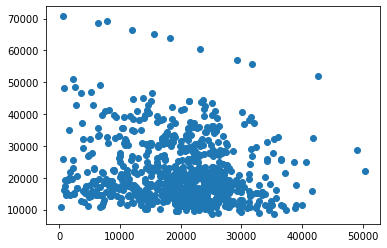

In [6]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt
plt.scatter(cars['Mileage'], cars['Price'])
print("Yes")

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [7]:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

# Linear regression model:
regr = linear_model.LinearRegression()
x = np.array(cars['Mileage']).reshape((-1, 1))
regr.fit(x, cars['Price'])
y_pred = regr.predict(x)

# Show summary statistics for the model:
X = cars['Mileage']
X = sm.add_constant(X)
y = cars['Price']

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           4.68e-05
Time:                        11:09:54   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.0

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [8]:
# Command:
print("Command was done in the previous step (coefficient)")
# One sentence summary:
print("For a unit increase in mileage, it is predicted that our price will decrease -0.17251")


Command was done in the previous step (coefficient)
For a unit increase in mileage, it is predicted that our price will decrease -0.17251


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [21]:
# Single command
zero_x = np.array([0]).reshape((-1, 1))
y_pred_2 = regr.predict(zero_x)
print("Predicted price with 0 miles:", y_pred_2)


Predicted price with 0 miles: [24764.5589912]


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

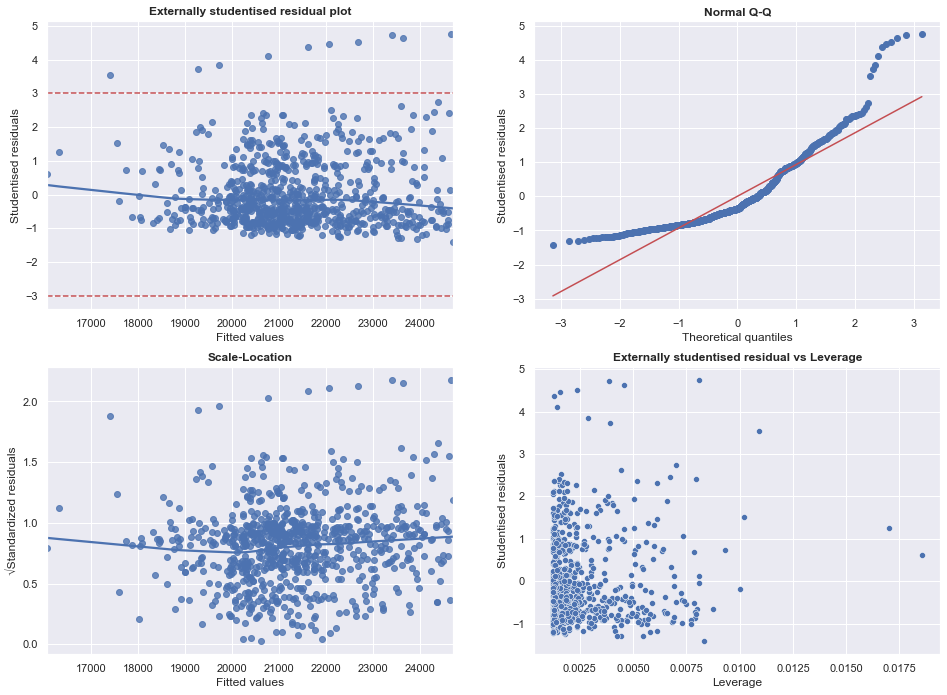

In [22]:
# Plot residuals
import seaborn as sns; sns.set()
from scipy import stats
def lm_stats1(X, y, y_pred):
    """ LEVERAGE & STUDENTISED RESIDUALS
    - https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize
    """
    # Responses as np array vector
    try:
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)

    # Residuals
    residuals = np.array(y - y_pred)

    # Hat matrix
    H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)

    # Leverage
    h_ii = H.diagonal()

    ## Externally studentised residual
    # In this case external studentisation is most appropriate
    # because we are looking for outliers.

    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)

    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)


    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii,
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df):
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']

    # setup axis for grid
    plt.figure(1, figsize=(16, 18))

    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');

    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')

    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')

    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

X = pd.concat([cars['Mileage']], axis=1)
# Create the Design Matrix by adding constant bias variable
intercept_const = pd.DataFrame({'intercept': np.ones(X.shape[0])})
X = np.array(pd.concat([intercept_const, X], axis=1))

y = cars['Price']

lm_plot(lm_stats1(X, y, y_pred))

# Explain whether there are any problems (1-2 sentence)
print("It seems that there are some strong outliers as shown in the bottom-right graph.")

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [33]:
# Commands:
import patsy
f = 'Mileage ~ Cylinder + Doors + Cruise + Sound + Leather'
y, X = patsy.dmatrices(f, cars, return_type='dataframe')

a_model = sm.OLS(y, X).fit()

print(a_model.summary())
# Explanation:
print("Comparing the r-squared from the previous model (0.02), this model has a lower r-squared which indicates the goodness of fit is lower. The first model seems more accurate considering this.")

                            OLS Regression Results                            
Dep. Variable:                Mileage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5459
Date:                Mon, 19 Oct 2020   Prob (F-statistic):              0.742
Time:                        11:43:56   Log-Likelihood:                -8384.2
No. Observations:                 804   AIC:                         1.678e+04
Df Residuals:                     798   BIC:                         1.681e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.148e+04   1814.679     11.839      0.0

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [35]:
# Command(s):
print(a_model.pvalues[a_model.pvalues < 0.05])

# Comment on the result
print("There are no highly correlated features. The above command shows that there is nothing with a p-value less than 0.05.")


Intercept    6.618965e-30
dtype: float64
There are no highly correlated features. The above command shows that there is nothing with a p-value less than 0.05.


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [41]:
chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)


# Commands that estimate the price of 'chevy' using the model with 6 predictors


PatsyError: Error evaluating factor: SyntaxError: invalid syntax (<string>, line 1)
    Mileage ~ Cylinder + Doors + Cruise + Sound + Leather=1
                                                  ^^^^^^^^^

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [ ]:
# Commands

# Comments on problems
#

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter your response here